# Part 1 – Data Loading and pre-processing


**a) Load the data into a pandas DataFrame**

In [1]:
# Importing pandas

import pandas as pd


In [2]:
# Loading the diamonds dataset

diamonds_dataset = pd.read_csv("../data/diamonds.csv")


**b) Clean the dataset by removing datapoints with missing values and datapoints that are repeated**

In [3]:
# Dropping missing values and duplicates

diamonds_dataset.dropna()
diamonds_dataset.drop_duplicates()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**c) For each feature in the dataset, make a figure containing 2 subplots showing:**

- The histogram of the values of the feature (all classes combined).
- The histogram of the values of the feature separately for each class, when using the "cut" column as the class identifier. Use a different color for each class.

In [4]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Creating a method to plot histograms


def plot_histograms(column: str):
    fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
    data = diamonds_dataset
    sns.histplot(data, x=column, stat="density", bins=50, ax=axs[0])
    sns.histplot(data, x=column, stat="density", bins=50, ax=axs[1], hue="cut")


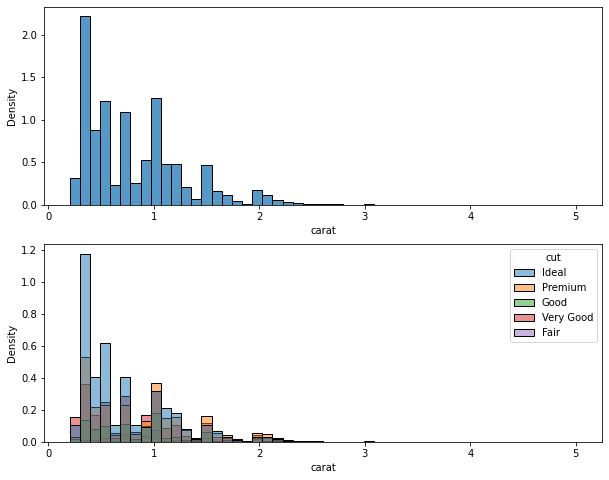

In [6]:
# Plotting the histograms for "carat"

plot_histograms("carat")


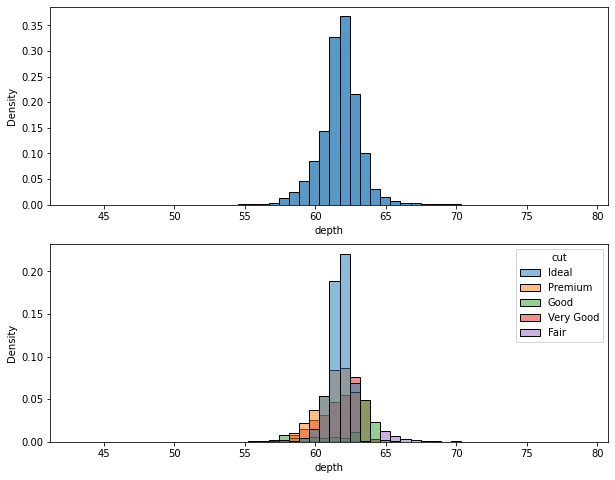

In [7]:
# Plotting the histograms for "depth"

plot_histograms("depth")


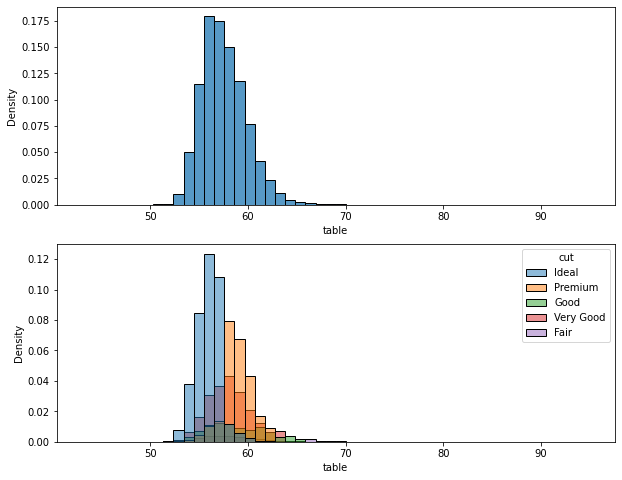

In [8]:
# Plotting the histograms for "table"

plot_histograms("table")


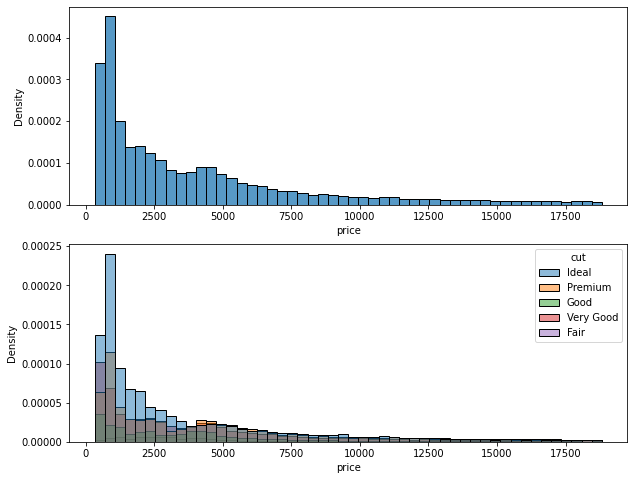

In [9]:
# Plotting the histograms for "price"

plot_histograms("price")


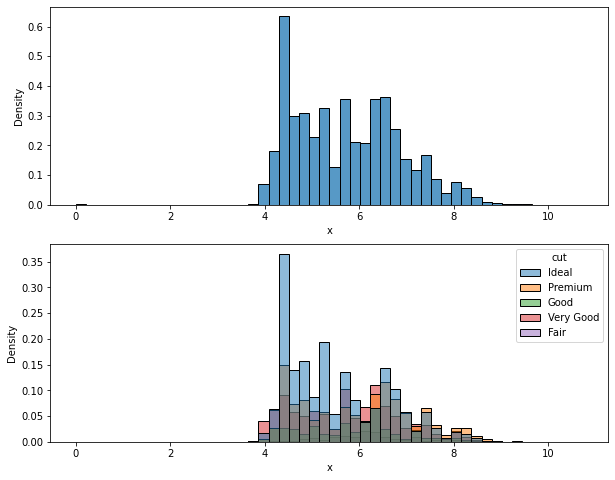

In [10]:
# Plotting the histograms for "x"

plot_histograms("x")


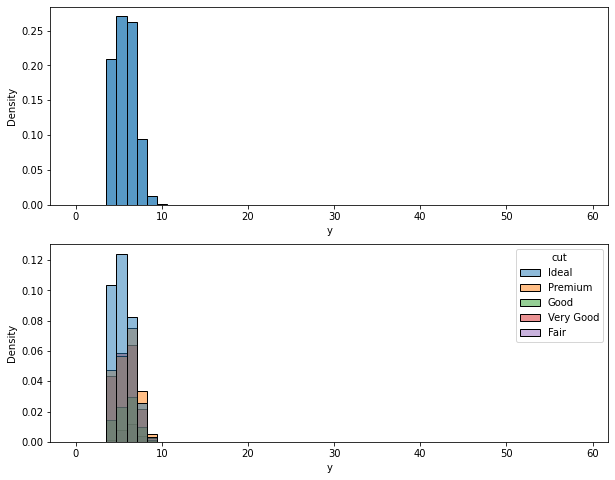

In [11]:
# Plotting the histograms for "y"

plot_histograms("y")


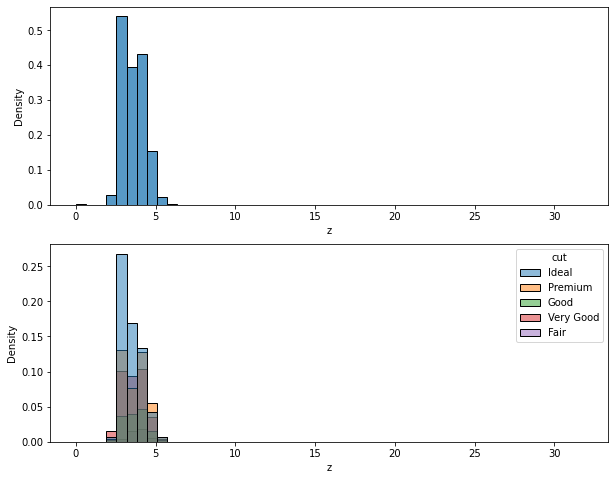

In [12]:
# Plotting the histograms for "z"

plot_histograms("z")


**d) Make a figure containing a matrix of subplots. These will present projections of the dataset
onto each pair of features, histogram of their distributions and values of Pearson correlation
coefficients.**

The matrix of subplots will be organized like Figure 2.

- The upper triangular section of the matrix will contain in the ($i$, $j$) entry the Pearson
  correlation between feature $i$ and feature $j$.
- The main diagonal will contain in position ($i$, $i$) the histograms of the values of feature $i$.
  These histograms are the same as you already plotted in point c): you should use a
  different colour for each class and histograms should have 50 bins and should be
  normalized (the area under the histogram should sum up to 1).
- The lower triangular section of the matrix will contain in the ($i$, $j$) entry the projections
  of the points onto the $i$ and $j$ features. Use a different colour for each class and the
  colours should match those used in the histograms.

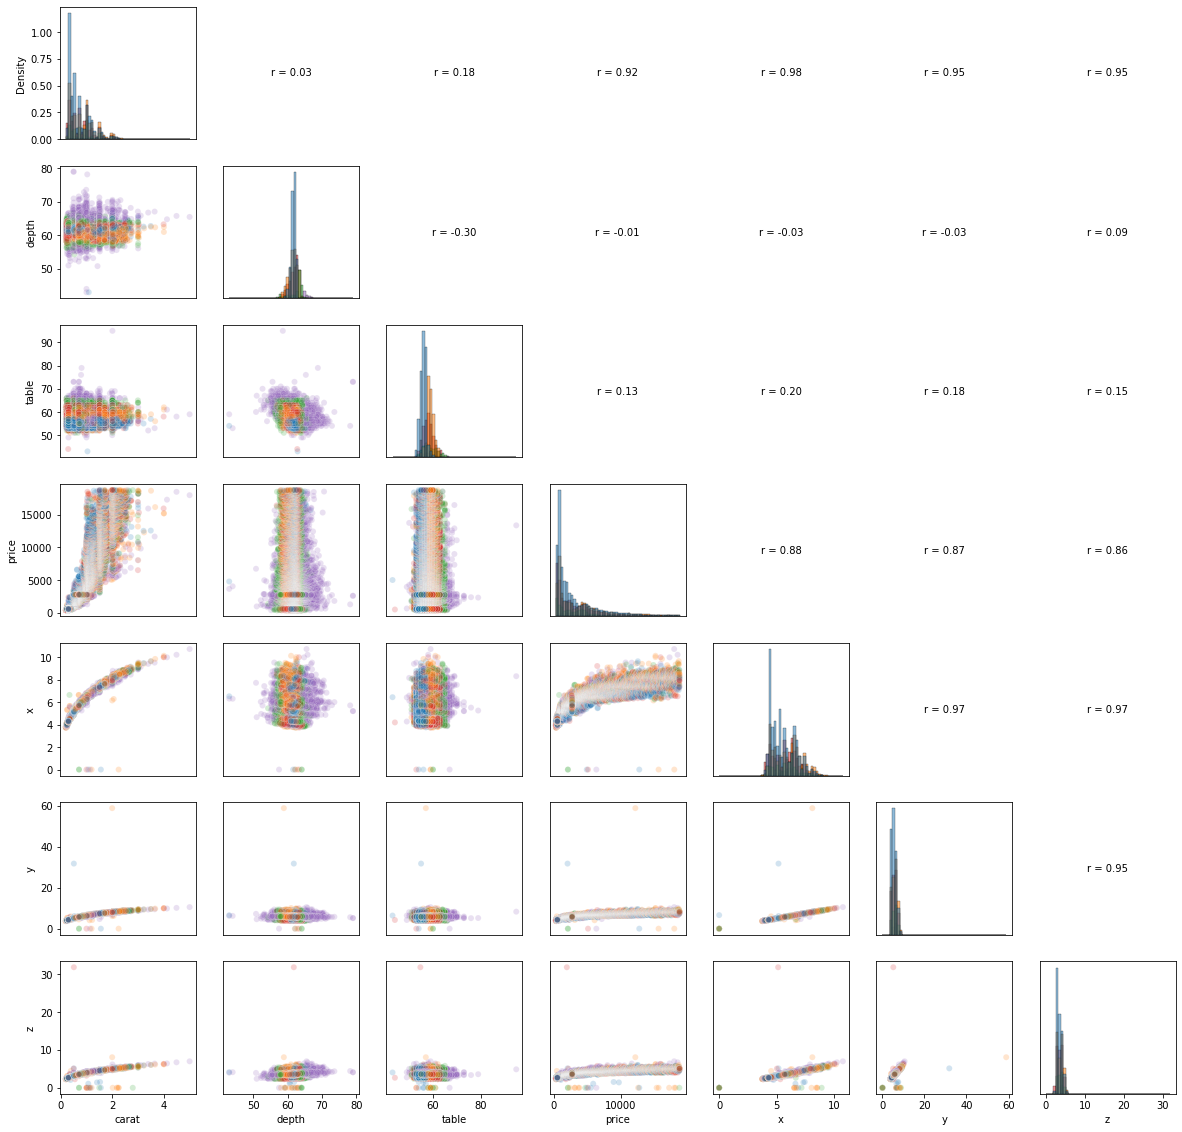

In [13]:
# Making the figure

from itertools import product
from numpy import corrcoef

columns = ["carat", "depth", "table", "price", "x", "y", "z"]
n = len(columns)

fix, axs = plt.subplots(nrows=n, ncols=n, figsize=(20, 20))

for i, j in product(range(n), range(n)):
    data = diamonds_dataset
    x = columns[j]
    y = columns[i]
    ax = axs[i, j]

    if i > j:
        sns.scatterplot(data=data, x=x, y=y, ax=ax, alpha=0.2, hue="cut")

    if i == j:
        plot = sns.histplot(data=data, x=x, stat="density", bins=50, ax=ax, hue="cut")

    if i < j:
        corr = corrcoef(data[x], data[y])[0, 1]
        ax.set_axis_off()
        ax.text(0.5, 0.5, f"r = {corr:.2f}", ha="center", va="center")

    if i != n - 1:
        ax.axes.get_xaxis().set_visible(False)
        ax.set_xticklabels([])

    if j != 0:
        ax.axes.get_yaxis().set_visible(False)
        ax.set_yticklabels([])

    ax.legend([], [], frameon=False)


# Part 2 – K-nearest-neighbour classifier

**a) Split the dataset into training, validation and testing sets.**

In [14]:
# Importing the libraries

import pandas as pd
import numpy as np


In [15]:
# Loading the diamonds dataset

diamonds_dataset = pd.read_csv("../data/diamonds.csv")
diamonds_dataset.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# Splitting the dataset into training, validation and testing sets

n = len(diamonds_dataset)
splits = [int(0.8 * n), int(0.95 * n)]

training, validation, testing = np.split(diamonds_dataset.sample(frac=1), splits)
training.shape, validation.shape, testing.shape


((43152, 10), (8091, 10), (2697, 10))

**b) Implement the scikit-learn estimator API for a K-nearest-neighbour classifier. Your estimator API will implement the Euclidean distance. Your estimator will accept the following parameters:**
- k: This parameter controls the number of neighbours to consider. Set the default value
to 5
- distances: This parameter allows the user to precalculate distances for the datapoints, overriding the default (Euclidean) distance that you have implemented. The values passed to this parameter can be either a matrix of pairwise similarities, or the string "euclidean". If the string "euclidean" is received, the estimator will calculate the distances; otherwise, no distances will be calculated, and the matrix that is being passed as a parameter will be used. Note that if the size of the matrix is not compatible with the number datapoints, your estimator must raise an Exception.

In [17]:
# Implementing the function to calculate the euclidean distance
# with the scikit-learn estimator API for a K-nearest-neighbour
# classifier


from sklearn.base import BaseEstimator


class KNNClassifier(BaseEstimator):
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, X, distances="euclidean"):
        n_samples = X.shape[0]
        predictions = np.empty(n_samples, dtype=object)

        if distances == "euclidean":
            for i in range(n_samples):
                point_distances = np.sum(np.square(self.X - X[i, :]), axis=1)
                idx = np.argpartition(point_distances, self.k)[:self.k]

                values, counts = np.unique(
                    self.y[idx], return_counts=True
                )

                predictions[i] = values[np.argmax(counts)]
        else:
            for i in range(n_samples):
                point_distances = self.distances[i, :]
                idx = np.argpartition(point_distances, self.k)[:self.k]

                values, counts = np.unique(
                    self.y[idx], return_counts=True
                )

                predictions[i] = values[np.argmax(counts)]

        return predictions


**c) Using your implementation of KNN, select the set of 3 numerical features that predict the "cut" variable with the best ACCURACY score on the validation set for each of the following different values of K: 2, 5, 10, and 15**

In [18]:
# Creating a dataset with all the accuracy scores

from sklearn.metrics import accuracy_score
import pandas as pd

ks = [2, 5, 10, 15]

columns = ["carat", "depth", "table", "price", "x", "y", "z"]
columns_permutations = []

for i in range(len(columns) - 2):
    for j in range(i + 1, len(columns) - 1):
        for k in range(j + 1, len(columns)):
            columns_permutations.append([columns[i], columns[j], columns[k]])

accuracy_scores = pd.DataFrame(columns=["k", "features", "accuracy"])

for k in ks:
    classifier = KNNClassifier(k=k)

    for permutation in columns_permutations:
        train_features = training[permutation].values
        train_cut = training["cut"].values

        testing_features = testing[permutation].values
        testing_cut = testing["cut"].values

        classifier.fit(train_features, train_cut)
        predictions = classifier.predict(testing_features)

        accuracy = accuracy_score(testing_cut, predictions)

        features = ", ".join(permutation)

        result = pd.DataFrame(
            {"k": [k], "features": [features], "accuracy": [accuracy]}
        )

        accuracy_scores = pd.concat(
            [accuracy_scores, result], ignore_index=True, axis=0
        )

        print(f"k={k}, features='{features}', accuracy={accuracy}")


k=2, features='carat, depth, table', accuracy=0.649981460882462
k=2, features='carat, depth, price', accuracy=0.457174638487208
k=2, features='carat, depth, x', accuracy=0.5368928439006303
k=2, features='carat, depth, y', accuracy=0.5517241379310345
k=2, features='carat, depth, z', accuracy=0.5409714497589915
k=2, features='carat, table, price', accuracy=0.5094549499443827
k=2, features='carat, table, x', accuracy=0.5973303670745272
k=2, features='carat, table, y', accuracy=0.5765665554319614
k=2, features='carat, table, z', accuracy=0.6025213199851687
k=2, features='carat, price, x', accuracy=0.3971078976640712
k=2, features='carat, price, y', accuracy=0.39488320355951056
k=2, features='carat, price, z', accuracy=0.41230997404523545
k=2, features='carat, x, y', accuracy=0.4938820912124583
k=2, features='carat, x, z', accuracy=0.5283648498331479
k=2, features='carat, y, z', accuracy=0.5242862439747868
k=2, features='depth, table, price', accuracy=0.5776789024842417
k=2, features='depth

In [19]:
# Selecting and printing the best accuracy scores for each k

best_accuracy_scores = accuracy_scores.groupby("k").max()
best_accuracy_scores.head()

,features,accuracy
k,,
2,"x, y, z",0.669633
5,"x, y, z",0.701520
10,"x, y, z",0.714127
15,"x, y, z",0.716722


**d) Make a barplot of the accuracy on the validation set obtained by each set of 3 numerical features for the different values of k, highlighting in a different color the bars with the best accuracy. The figure should look like Figure 3 (with different values, as in the Figure I randomized the data and feature names to avoid giving away the solution)**

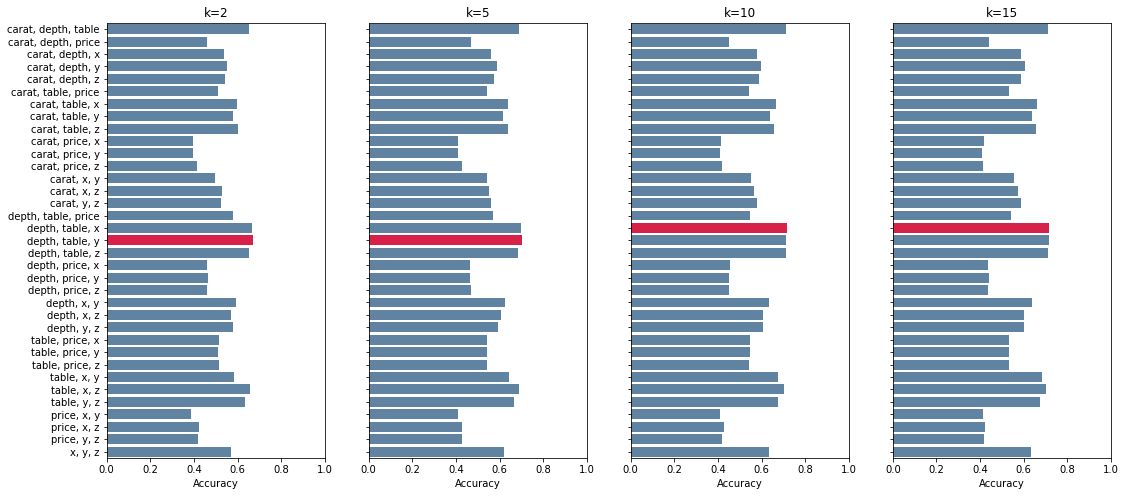

In [20]:
# Plotting the accuracy scores for each k and set of columns

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(18, 8), sharey=True)

for i, k in enumerate(ks):
    ax = axs[i]
    ax.set_title(f"k={k}")

    data = accuracy_scores[accuracy_scores["k"] == k]

    sns.barplot(
        data = data,
        x = "accuracy",
        y = "features",
        ax = ax,
        color = "#5584AC",
        order = data["features"].values,
    )

    best_acc = best_accuracy_scores.loc[k, "accuracy"]
    best_acc_index = data["accuracy"].values.argmax()
    ax.patches[best_acc_index].set_facecolor("#D82148")

    ax.set(xlim=(0, 1), xlabel="Accuracy", ylabel="")


# Part 3 – Linear Regression

Use the dataset you loaded in Part 1 with the dataset splits from Part 2. You will implement two different solutions for linear regression with weight decay regularization:

- Using the closed form (normal equations with weight decay)
- Using stochastic gradient descent.

Your implementation will predict the value of the “price” variable using all the remaining numerical features. It will consist of a scikit-learn estimator API with the following parameters:

- **solver**: This parameter selects which algorithm is used to learn the coefficients of the linear regression. Passing “cf” will select the closed form solution, passing “sgd” will select the stochastic gradient descent. Set the default value to “cf”.
- **max_iter**: This parameter is relevant only when the solver is “sgd”. It controls the number of iterations (over the entire dataset) of the stochastic gradient descent algorithm. Set the default value to 100.
- **learning_rate**: This parameter is relevant only when the solver is “sgd”. Set the default value to 0.0001.


In [21]:
# Loading and splitting the dataset

import pandas as pd
import numpy as np

diamonds_dataset = pd.read_csv("../data/diamonds.csv")
diamonds_dataset = diamonds_dataset.drop(columns=["cut", "color", "clarity"])

n = len(diamonds_dataset)
splits = [int(0.8 * n), int(0.9 * n)]

training, validation, testing = np.split(diamonds_dataset.sample(frac=1), splits)


In [22]:
# Implementing the linear regression model using
# the closed form solution and the stochastic gradient descent

from sklearn.base import BaseEstimator


class LinearRegression(BaseEstimator):
    def __init__(
        self, solver: str = "sgd", max_iter: int = 100, learning_rate: float = 0.0001
    ):
        self.solver = solver
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def _fit_cf(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        regularization_term = np.sqrt(np.sum(np.square(X)) / n)

        lambda_I = np.eye(X.shape[1]) * regularization_term
        w = np.linalg.inv(X.T @ X + lambda_I) @ X.T @ y

        return w

    def _fit_sgd(self, X: np.ndarray, y: np.ndarray):
        n_samples, n_features = X.shape
        w = np.zeros(n_features)

        for i in range(self.max_iter):
            for j in range(n_samples):
                gradient = (y[j] - w @ X[j]) * X[j]
                w += self.learning_rate * gradient

        return w

    def fit(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]

        if self.solver == "cf":
            self.w = self._fit_cf(X_, y)
        elif self.solver == "sgd":
            self.w = self._fit_sgd(X_, y)
        else:
            raise ValueError("Solver not implemented")

    def predict(self, X):
        X_ = np.c_[np.ones(len(X)), X]
        return X_ @ self.w


In [23]:
# Preparing the data

X_training = training.drop(columns=["price"]).to_numpy()
y_training = training["price"].to_numpy()

X_testing = testing.drop(columns=["price"]).to_numpy()
y_testing = testing["price"].to_numpy()


In [24]:
# Calculating a "dummy" prediction and its
# associated MSE

from sklearn.metrics import mean_squared_error

dummy_predictions = np.full(y_testing.shape[0], np.mean(y_training))
dummy_error = mean_squared_error(y_testing, dummy_predictions, squared=False)


In [25]:
# Predicting the value of the price variable
# using the closed form solution with weight
# decay

from sklearn.metrics import mean_squared_error

cf_lr = LinearRegression(solver="cf")

cf_lr.fit(X_training, y_training)
predictions = cf_lr.predict(X_testing)
error = mean_squared_error(y_testing, predictions, squared=False)

print(f"Mean squared error:\t\t{error}")
print(f"Dummy mean squared error:\t{dummy_error}")
print(f"Ratio:\t\t\t\t{error / dummy_error}")


Mean squared error:		1556.7592362129626
Dummy mean squared error:	3965.244219015427
Ratio:				0.3926010985016976


In [26]:
# Predicting the value of the price variable
# using the stochastic gradient descent

sgd_lr = LinearRegression(solver="sgd")

sgd_lr.fit(X_training, y_training)
predictions = sgd_lr.predict(X_testing)
error = mean_squared_error(y_testing, predictions, squared=False)

print(f"Mean squared error:\t\t{error}")
print(f"Dummy mean squared error:\t{dummy_error}")
print(f"Ratio:\t\t\t\t{error / dummy_error}")


Mean squared error:		1549.283955058054
Dummy mean squared error:	3965.244219015427
Ratio:				0.3907158978073594


# Part 4 – Model Comparison


1 - For the classification problem (you developed the estimator in Part 2) you will use all the
numerical features and predict the “cut”. The steps to implement are:

- Select 3 classifiers from the scikit-learn library (you can pick any classifier of your choice,
  including those not seen in class yet).
- For each model (your model as well as the scikit-learn ones), use the training and
  validation sets to choose the best hyperparameters.
- Combine the training and validation sets into a single set and use it to train the models
  with the chosen hyperparameters.
- Compare the performance of the different estimators using the accuracy score.
- Make a plot that shows this comparison (here you can use any type of plot you like, as
  long as the comparison is clear).


In [27]:
# Doing everything done in part-2.ipynb

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator

diamonds_dataset = pd.read_csv("../data/diamonds.csv")

n = len(diamonds_dataset)
splits = [int(0.8 * n), int(0.9 * n)]
training, validation, testing = np.split(diamonds_dataset.sample(frac=1), splits)


class KNNClassifier(BaseEstimator):
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, X, distances="euclidean"):
        n_samples = X.shape[0]
        predictions = np.empty(n_samples, dtype=object)

        if distances == "euclidean":
            for i in range(n_samples):
                point_distances = np.sum(np.square(self.X - X[i, :]), axis=1)
                idx = np.argpartition(point_distances, self.k)[: self.k]

                values, counts = np.unique(self.y[idx], return_counts=True)

                predictions[i] = values[np.argmax(counts)]
        else:
            for i in range(n_samples):
                point_distances = self.distances[i, :]
                idx = np.argpartition(point_distances, self.k)[: self.k]

                values, counts = np.unique(self.y[idx], return_counts=True)

                predictions[i] = values[np.argmax(counts)]

        return predictions


In [28]:
# Importing 3 classifiers from sciki-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
# Testing the hyperparameters

from sklearn.metrics import accuracy_score

features = ["carat", "depth", "table", "price", "x", "y", "z"]
target = "cut"

estimators = []

X_train, y_train = training[features].to_numpy(), training[target].to_numpy()
X_validation, y_validation = (
    validation[features].to_numpy()[:500],
    validation[target].to_numpy()[:500],
)

for k in [2, 10, 50, 100]:
    estimator = KNNClassifier(k=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    accuracy = accuracy_score(y_validation, predictions)
    estimators.append(("KNNClassifier", k, accuracy))

    print(f"KNNClassifier(k={k}): {accuracy:.2f}%")

for k in [2, 10, 50, 100]:
    estimator = KNeighborsClassifier(n_neighbors=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    accuracy = accuracy_score(y_validation, predictions)
    estimators.append(("KNeighborsClassifier", k, accuracy))

    print(f"KNeighborsClassifier(n_neighbors={k}): {accuracy:.2f}%")

for k in [2, 10, 50, 100]:
    estimator = DecisionTreeClassifier(max_depth=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    accuracy = accuracy_score(y_validation, predictions)
    estimators.append(("DecisionTreeClassifier", k, accuracy))

    print(f"DecisionTreeClassifier(max_depth={k}): {accuracy:.2f}%")

for k in [2, 10, 50, 100]:
    estimator = RandomForestClassifier(n_estimators=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    accuracy = accuracy_score(y_validation, predictions)
    estimators.append(("RandomForestClassifier", k, accuracy))

    print(f"RandomForestClassifier(n_estimators={k}): {accuracy:.2f}%")


KNNClassifier(k=2): 0.56%
KNNClassifier(k=10): 0.55%
KNNClassifier(k=50): 0.47%
KNNClassifier(k=100): 0.46%
KNeighborsClassifier(n_neighbors=2): 0.56%
KNeighborsClassifier(n_neighbors=10): 0.55%
KNeighborsClassifier(n_neighbors=50): 0.47%
KNeighborsClassifier(n_neighbors=100): 0.46%
DecisionTreeClassifier(max_depth=2): 0.68%
DecisionTreeClassifier(max_depth=10): 0.78%
DecisionTreeClassifier(max_depth=50): 0.74%
DecisionTreeClassifier(max_depth=100): 0.74%
RandomForestClassifier(n_estimators=2): 0.72%
RandomForestClassifier(n_estimators=10): 0.78%
RandomForestClassifier(n_estimators=50): 0.82%
RandomForestClassifier(n_estimators=100): 0.82%


In [30]:
# Selecting the best estimators

best_estimators = {}

for name, k, accuracy in estimators:
    estimator = None

    match name:
        case "KNNClassifier":
            estimator = KNNClassifier(k=k)
        case "KNeighborsClassifier":
            estimator = KNeighborsClassifier(n_neighbors=k)
        case "DecisionTreeClassifier":
            estimator = DecisionTreeClassifier(max_depth=k)
        case "RandomForestClassifier":
            estimator = RandomForestClassifier(n_estimators=k)

    if name not in best_estimators:
        best_estimators[name] = (estimator, accuracy)

    if accuracy > best_estimators[name][1]:
        best_estimators[name] = (estimator, accuracy)

best_estimators


{'KNNClassifier': (KNNClassifier(k=2), 0.56),
 'KNeighborsClassifier': (KNeighborsClassifier(n_neighbors=2), 0.56),
 'DecisionTreeClassifier': (DecisionTreeClassifier(max_depth=10), 0.778),
 'RandomForestClassifier': (RandomForestClassifier(), 0.82)}

In [31]:
# Getting the final accuracies

accuracies = pd.DataFrame(columns=["estimator", "accuracy"])

X = np.concatenate((X_train, X_validation))
y = np.concatenate((y_train, y_validation))

X_test = testing[features].to_numpy()
y_test = testing[target].to_numpy()

for name, (estimator, _) in best_estimators.items():
    estimator.fit(X, y)
    predictions = estimator.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    accuracies = pd.concat(
        [accuracies, pd.DataFrame({"estimator": [name], "accuracy": [accuracy]})],
        axis=0,
        ignore_index=True,
    )

accuracies


,estimator,accuracy
0,KNNClassifier,0.574713
1,KNeighborsClassifier,0.574527
2,DecisionTreeClassifier,0.754542
3,RandomForestClassifier,0.788098


<AxesSubplot:xlabel='estimator', ylabel='accuracy'>

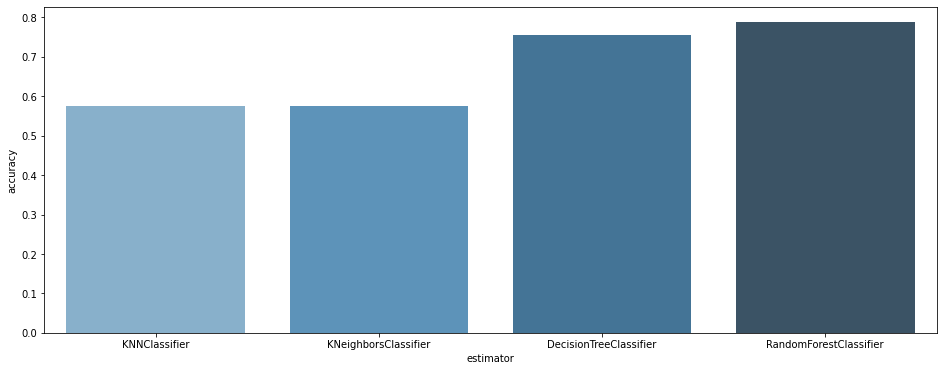

In [32]:
# Plotting the accuracies

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=accuracies, x="estimator", y="accuracy", palette="Blues_d", ax=ax)


2 - For the regression problem (you developed the estimator in Part 2) you will predict the "price" using the remaining numerical features. The steps to implement are:
- Select 3 regressors from the scikit-learn library (you can pick any regressor of your
choice, including those not seen in class yet).
- For each model (your model as well as the scikit-learn ones), use the training and
validation sets to choose the best hyperparameters.
- Combine the training and validation sets into a single set and use it to train the models
with the chosen hyperparameters.
- Compare the performance of the different estimators using the Root Mean Square Error
score.
- Make a plot that shows this comparison (here you can use any type of plot you like, as
long as the comparison is clear).

In [33]:
# Doing everything done in part-3.ipynb

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator

diamonds_dataset = pd.read_csv("../data/diamonds.csv")

n = len(diamonds_dataset)
splits = [int(0.8 * n), int(0.9 * n)]
training, validation, testing = np.split(diamonds_dataset.sample(frac=1), splits)


class LinearRegression(BaseEstimator):
    def __init__(
        self, solver: str = "sgd", max_iter: int = 100, learning_rate: float = 0.0001
    ):
        self.solver = solver
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def _fit_cf(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        regularization_term = np.sqrt(np.sum(np.square(X)) / n)

        lambda_I = np.eye(X.shape[1]) * regularization_term
        w = np.linalg.inv(X.T @ X + lambda_I) @ X.T @ y

        return w

    def _fit_sgd(self, X: np.ndarray, y: np.ndarray):
        n_samples, n_features = X.shape
        w = np.zeros(n_features)

        for i in range(self.max_iter):
            for j in range(n_samples):
                gradient = (y[j] - w @ X[j]) * X[j]
                w += self.learning_rate * gradient

        return w

    def fit(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]

        if self.solver == "cf":
            self.w = self._fit_cf(X_, y)
        elif self.solver == "sgd":
            self.w = self._fit_sgd(X_, y)
        else:
            raise ValueError("Solver not implemented")

    def predict(self, X):
        X_ = np.c_[np.ones(len(X)), X]
        return X_ @ self.w



In [34]:
# Importing 3 regressors from scikit-learn

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor


In [35]:
# Testing the hyperparameters

from sklearn.metrics import mean_squared_error


def rmse(y_true: np.ndarray, y_pred: np.ndarray):
    return mean_squared_error(y_true, y_pred, squared=False)


features = ["carat", "depth", "table", "x", "y", "z"]
target = "price"

estimators = []

X_train, y_train = training[features].to_numpy(), training[target].to_numpy()
X_validation, y_validation = (
    validation[features].to_numpy()[:500],
    validation[target].to_numpy()[:500],
)

for k in [2, 10, 50, 100]:
    estimator = LinearRegression(solver="sgd", max_iter=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    error = rmse(y_validation, predictions)
    estimators.append(("LinearRegression", k, error))

    print(f"LinearRegression(max_iter={k}): {error:.2f}")

for k in [2, 10, 50, 100, 500]:
    estimator = DecisionTreeRegressor(min_samples_leaf=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    error = rmse(y_validation, predictions)
    estimators.append(("DecisionTreeRegressor", k, error))

    print(f"DecisionTreeRegressor(min_samples_leaf={k}): {error:.2f}")

for k in [2, 100, 500, 2000, 5000]:
    estimator = LinearSVR(epsilon=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    error = rmse(y_validation, predictions)
    estimators.append(("LinearSVR", k, error))

    print(f"LinearSVR(epsilon={k}): {error:.2f}")

for k in [2, 10, 50, 100, 500]:
    estimator = GradientBoostingRegressor(n_estimators=k)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_validation)

    error = rmse(y_validation, predictions)
    estimators.append(("GradientBoostingRegressor", k, error))

    print(f"GradientBoostingRegressor(n_estimators={k}): {error:.2f}")


LinearRegression(max_iter=2): 1984.30
LinearRegression(max_iter=10): 1901.01
LinearRegression(max_iter=50): 1952.52
LinearRegression(max_iter=100): 1984.41
DecisionTreeRegressor(min_samples_leaf=2): 1924.50
DecisionTreeRegressor(min_samples_leaf=10): 1497.99
DecisionTreeRegressor(min_samples_leaf=50): 1428.37
DecisionTreeRegressor(min_samples_leaf=100): 1393.02
DecisionTreeRegressor(min_samples_leaf=500): 1380.54
LinearSVR(epsilon=2): 2352.19
LinearSVR(epsilon=100): 2341.60
LinearSVR(epsilon=500): 2231.65
LinearSVR(epsilon=2000): 1911.18
LinearSVR(epsilon=5000): 3433.12
GradientBoostingRegressor(n_estimators=2): 3981.42
GradientBoostingRegressor(n_estimators=10): 2247.23
GradientBoostingRegressor(n_estimators=50): 1403.10
GradientBoostingRegressor(n_estimators=100): 1384.43
GradientBoostingRegressor(n_estimators=500): 1392.38


In [36]:
# Selecting the best estimators

best_estimators = {}

for name, k, error in estimators:
    estimator = None

    match name:
        case "LinearRegression":
            estimator = LinearRegression(solver="sgd", max_iter=k)
        case "DecisionTreeRegressor":
            estimator = DecisionTreeRegressor(min_samples_leaf=k)
        case "LinearSVR":
            estimator = LinearSVR(epsilon=k)
        case "GradientBoostingRegressor":
            estimator = GradientBoostingRegressor(n_estimators=k)

    if name not in best_estimators:
        best_estimators[name] = (estimator, error)

    if error < best_estimators[name][1]:
        best_estimators[name] = (estimator, error)

best_estimators


{'LinearRegression': (LinearRegression(max_iter=10), 1901.014243123872),
 'DecisionTreeRegressor': (DecisionTreeRegressor(min_samples_leaf=500),
  1380.5404949989627),
 'LinearSVR': (LinearSVR(epsilon=2000), 1911.1793685396435),
 'GradientBoostingRegressor': (GradientBoostingRegressor(),
  1384.4254091283553)}

In [37]:
# Getting the final errors

errors = pd.DataFrame(columns=["estimator", "error"])

X = np.concatenate((X_train, X_validation))
y = np.concatenate((y_train, y_validation))

X_test = testing[features].to_numpy()
y_test = testing[target].to_numpy()

for name, (estimator, _) in best_estimators.items():
    estimator.fit(X, y)
    predictions = estimator.predict(X_test)

    error = rmse(y_test, predictions)

    errors = pd.concat(
        [errors, pd.DataFrame({"estimator": [name], "error": [error]})],
        axis=0,
        ignore_index=True,
    )

errors


,estimator,error
0,LinearRegression,1920.163202
1,DecisionTreeRegressor,1420.006979
2,LinearSVR,1807.859873
3,GradientBoostingRegressor,1383.276633


<AxesSubplot:xlabel='estimator', ylabel='error'>

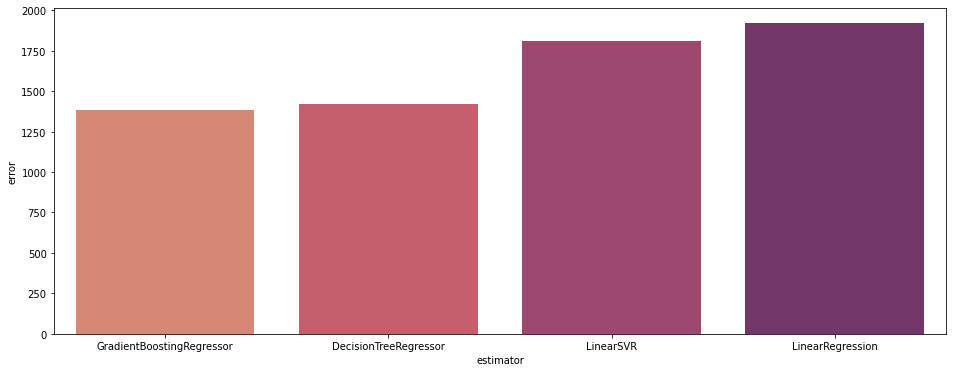

In [38]:
# Plotting the accuracies

import seaborn as sns
import matplotlib.pyplot as plt

data = errors.sort_values(by="error")
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x="estimator", y="error", palette="flare", ax=ax)
